# **QTM 151 Final Project**

# 🏎️ Exploring the Engines of Success in Formula 1 


In [1]:
# Print Names
team_members = [
    "Amanda Middelthon",
    "Anika Chandra",
    "Cassiel Chen",
    "Tianyi Zhang"
]


decorative_line = "~" * 60
print(decorative_line)
print("🌊 TEAM MEMBERS 🌊".center(60))
print(decorative_line)
for member in team_members:
    print(f"~ {member.center(56)} ~")
print(decorative_line)


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                      🌊 TEAM MEMBERS 🌊                      
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~                    Amanda Middelthon                     ~
~                      Anika Chandra                       ~
~                       Cassiel Chen                       ~
~                       Tianyi Zhang                       ~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## Section 1: Introduction

Formula 1 (F1) stands at the pinnacle of international auto racing, blending state-of-the-art automotive engineering, elite athleticism, and razor-sharp strategy. Celebrated across the globe, F1's legacy is richly documented on authoritative websites such as [Formula1.com](https://www.formula1.com/) and [Wikipedia's Formula One page](https://en.wikipedia.org/wiki/Formula_One). Beyond the thrill of high-speed competition, the sport is a compelling fusion of cutting-edge technology, dynamic team tactics, and diverse circuit designs that create an enduring spectacle for fans and experts alike.

![Modern F1 Race Car](https://cdn.ferrari.com/cms/network/media/img/resize/5e5789ba4125497a8dd90672-ferrari-scuderia-f1-2020-galleries-hero-desk?width=1080)
*Figure 1: A modern Ferrari F1 team car in action*

In this project, we explore the multifaceted dynamics of Formula 1 by examining performance trends and the influence of geographic factors on race outcomes. Our analysis begins by integrating a subset of datasets derived from the relational tables available to us, specifically the **Drivers**, **Races**, **Results**, and **Circuits** tables. The **Drivers** table offers critical insights into each competitor, including their nationality—which is instrumental in assessing the geographic influences on performance. Meanwhile, the **Races** and **Results** tables provide a detailed record of the events and outcomes, such as finishing positions and points scored, and the **Circuits** table contextualizes these events by linking each race to its venue.

By merging these datasets and conducting a comprehensive analysis, we aim to uncover nuanced insights into how personal talent, team strategies, and track characteristics converge to define the unpredictable nature of Formula 1 racing. This investigation not only deepens our understanding of the sport but also offers a data-driven perspective on the evolving dynamics of a truly global competition.


## Section 2: Data Description

For our analysis, we are focusing on a curated subset of the comprehensive Formula 1 dataset, which comprises 14 tables. We have selected the **Drivers**, **Races**, **Results**, and **Circuits** tables because they offer a multi-dimensional view of the sport.

- **Drivers**: Each row in this table represents a unique Formula 1 driver and includes essential details such as the driver's name, nationality, and date of birth. This table provides the backbone for understanding the personal attributes and backgrounds that influence performance on the track.

- **Races**: This table captures the details of every race event—from the race date and round to the season in which it took place. These records span the historical evolution of the sport, allowing us to track changes and trends in race conditions over the years.

- **Results**: In the **Results** table, each row details the performance of a driver in a specific race. Key metrics include finishing positions, points scored, and other race-specific data. This table is crucial for linking driver performance to individual events and understanding the outcomes.

- **Circuits**: Each row in the **Circuits** table describes a race venue, including the circuit name, location, and geographic coordinates. These details enable us to explore how track characteristics might impact race performance.

Together, these tables form a rich dataset that will allow us to merge information from different dimensions of Formula 1 racing. By analyzing these interconnected datasets, we aim to uncover insights into how driver nationality, race features, and circuit attributes collectively influence race outcomes.

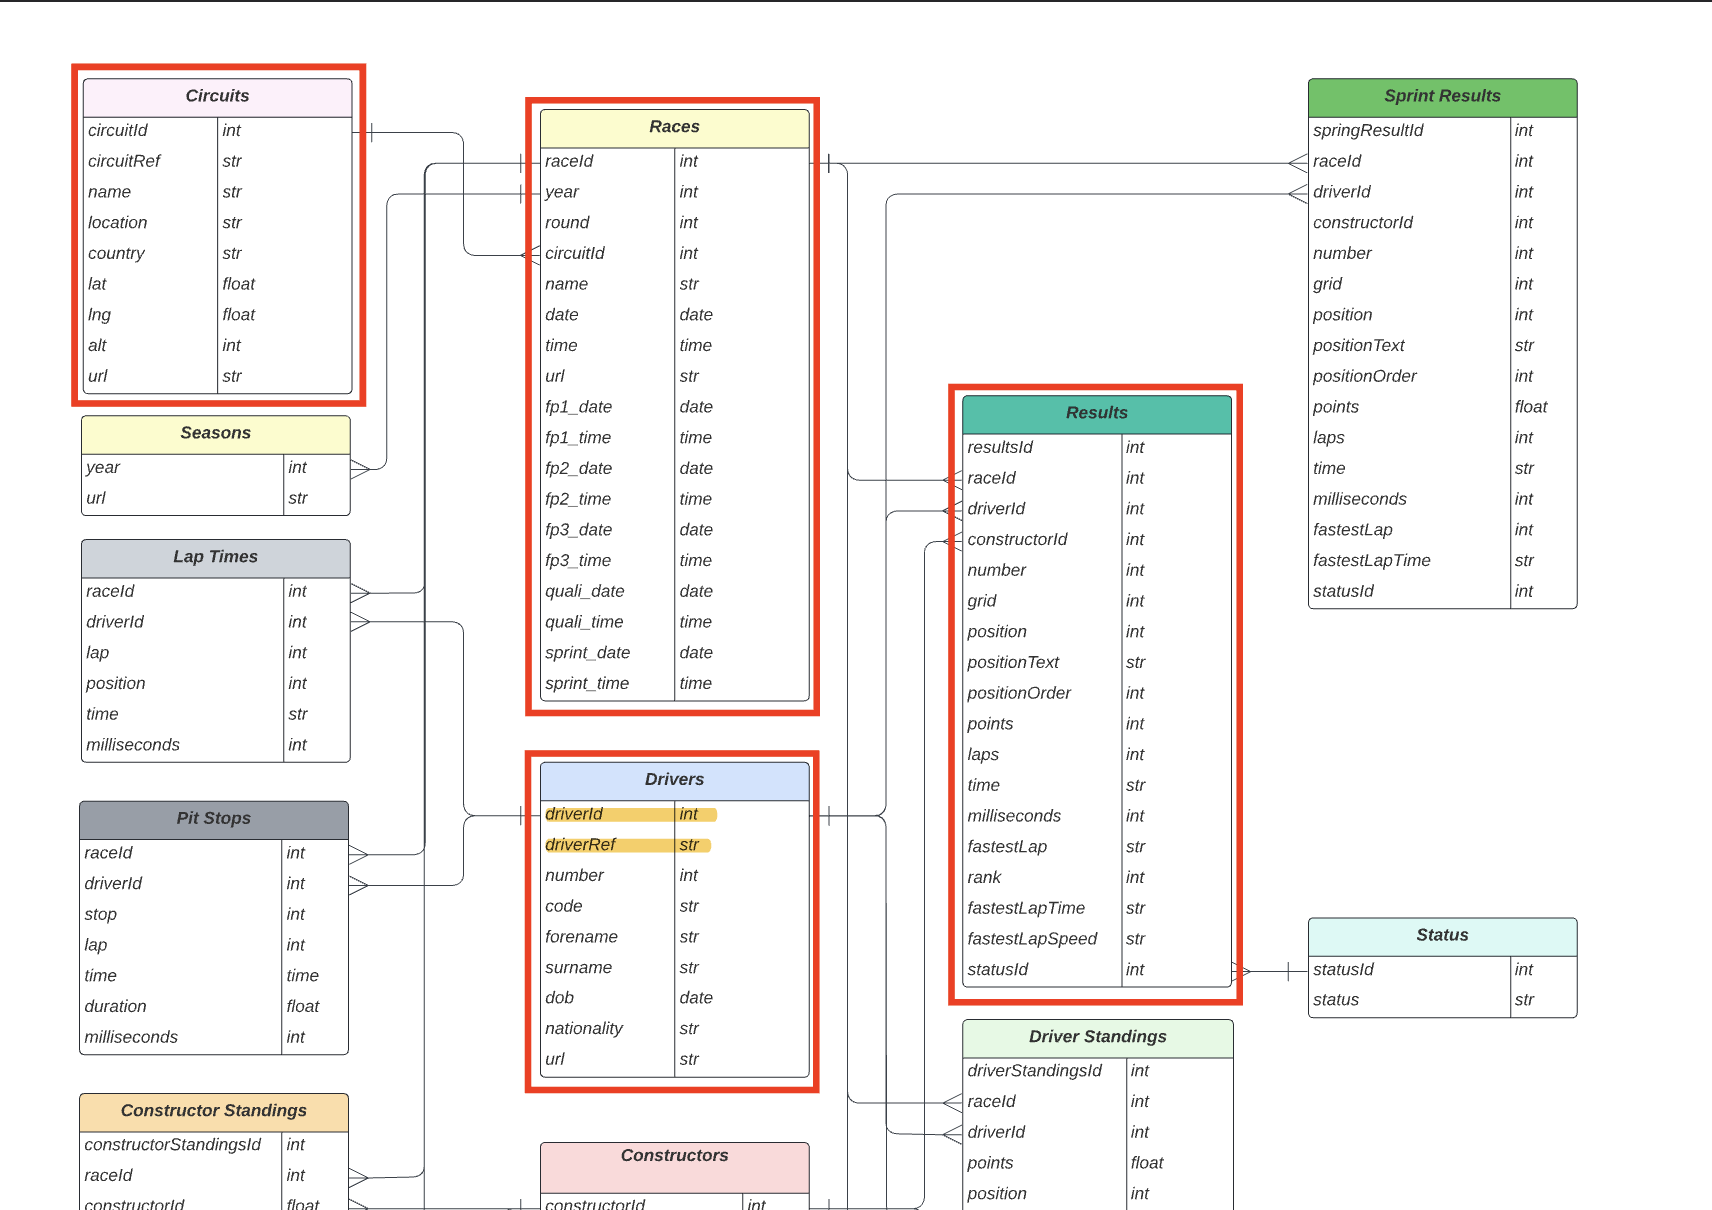
*Figure 2: Selected datasets for our study*


### Library Imports and Directory Setup

Before beginning our analysis, we need to import several Python libraries that will help us manipulate data, perform numerical computations, and create visualizations. We also set up our environment by determining the current working directory and specifying the subfolder (`data_raw`) where our raw data is stored. 

- **Pandas** enables efficient data manipulation with its DataFrame objects.
- **NumPy** is used for handling numerical operations and computations.
- **Matplotlib** and **Seaborn** assist in creating both simple and complex visualizations.
- **OS** helps us interact with the operating system to manage file paths.

Below is the code snippet that imports these libraries, configures our plotting settings, and sets the directory for our raw data.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

current_dir = os.getcwd()
data_dir = os.path.join(current_dir, 'data_raw')

# print("Current working directory:", current_dir)
# print("Data directory:", data_dir)

## Loading Datasets and Counting Observations

In this section, we load the selected Formula 1 datasets from our specified `data_raw` directory. We work with four key tables:

- **Drivers**: Contains information about each driver, such as name, nationality, and date of birth.
- **Races**: Records details of every race event, including the race date, round, and season.
- **Results**: Provides performance metrics for drivers in each race, such as finishing positions and points scored.
- **Circuits**: Holds details about the race circuits, including circuit name, location, and geographic coordinates.

The following code snippet reads each dataset from its corresponding CSV file and prints out the number of rows to ensure that the data has loaded correctly.


In [3]:
# Load the datasets and count the number of observations in each

# Load the Drivers dataset: each row represents a unique Formula 1 driver with details such as name, nationality, and date of birth.
drivers = pd.read_csv(os.path.join(data_dir, 'drivers.csv'))
print("Drivers dataset loaded with", drivers.shape[0], "rows.")

# Load the Races dataset: each row records a single race event, with details like race date, round, and season.
races = pd.read_csv(os.path.join(data_dir, 'races.csv'))
print("Races dataset loaded with", races.shape[0], "rows.")

# Load the Results dataset: each row includes performance metrics for a driver in a specific race (e.g., finishing positions, points scored).
results = pd.read_csv(os.path.join(data_dir, 'results.csv'))
print("Results dataset loaded with", results.shape[0], "rows.")

# Load the Circuits dataset: each row represents a race circuit with details like circuit name, location, and geographic coordinates.
circuits = pd.read_csv(os.path.join(data_dir, 'circuits.csv'))
print("Circuits dataset loaded with", circuits.shape[0], "rows.")


Drivers dataset loaded with 857 rows.
Races dataset loaded with 1102 rows.
Results dataset loaded with 25840 rows.
Circuits dataset loaded with 77 rows.


The Drivers dataset contains 857 rows, Races has 1102 rows, Results includes 25840 rows, and Circuits comprises 77 rows.

#### Drivers Dataset Exploration

The **Drivers** dataset contains information for each unique Formula 1 driver, such as their name, nationality, and date of birth. In the code below, we display the first five rows, the detailed dataset information (data types and non-null counts), and summary statistics to understand the structure and composition of the data.


In [4]:
# Preview the first 5 rows of the Drivers dataset
print("First 5 Rows of the Drivers Dataset:")
print(drivers.head())

First 5 Rows of the Drivers Dataset:
   driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen  


Above is a snapshot of the first five rows from the Drivers dataset, which comprises 857 records in total. Each row represents a unique Formula 1 driver and includes key information such as the internal driver ID, an external reference, the driver's racing number (which may be absent in some cases), a short driver code, first name, last name, date of birth, nationality, and a URL linking to their Wikipedia page. For instance, the first entry in this dataset corresponds to Lewis Hamilton, one of the sport’s most celebrated figures. To honor his legacy, we also include an image of him below.

![Lewis Hamilton](https://media.formula1.com/image/upload/f_auto,c_limit,q_auto,w_1320/content/dam/fom-website/drivers/2025Drivers/hamilton)
*Figure 3: Picture of Lewis Hamilton - F1 Driver for Ferrari*

In [5]:
# Display dataset information
print("Dataset Information:")
drivers.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


The Drivers dataset has 857 entries with nine key columns: **driverId** (int), **driverRef** (string), **number** (string), **code** (string), **forename** (string), **surname** (string), **dob** (date), **nationality** (string), and **url** (string). 

Although every row in the Drivers dataset is populated, you may notice that some fields (e.g., in the "number" column) display "\N". This placeholder is used to indicate missing or unavailable data. While the dataset shows 857 non-null entries for each column, these "\N" entries effectively represent null values. For accurate analysis, it can be beneficial to replace "\N" with a standard null value (e.g., NaN) during data preprocessing.


In [6]:
# Display summary statistics for the Drivers dataset
print("Summary Statistics:")
print(drivers.describe(include='all'))


Summary Statistics:
          driverId driverRef number code forename surname         dob  \
count   857.000000       857    857  857      857     857         857   
unique         NaN       857     45   95      476     798         839   
top            NaN  hamilton     \N   \N     John  Taylor  1935-07-23   
freq           NaN         1    803  757       14       5           2   
mean    429.057176       NaN    NaN  NaN      NaN     NaN         NaN   
std     247.632402       NaN    NaN  NaN      NaN     NaN         NaN   
min       1.000000       NaN    NaN  NaN      NaN     NaN         NaN   
25%     215.000000       NaN    NaN  NaN      NaN     NaN         NaN   
50%     429.000000       NaN    NaN  NaN      NaN     NaN         NaN   
75%     643.000000       NaN    NaN  NaN      NaN     NaN         NaN   
max     858.000000       NaN    NaN  NaN      NaN     NaN         NaN   

       nationality                                          url  
count          857                   

The summary statistics for the Drivers dataset provide an essential glimpse into its structure and complexity. For numeric fields like **driverId**, the summary presents standard measures such as count, mean, standard deviation, and range, giving an idea of the distribution across entries. For categorical fields (e.g., **driverRef**, **forename**, **surname**, **nationality**, **url**), the summary returns the count, number of unique values, most frequent value, and its frequency. These details reveal that while each driver has a unique identifier, many other fields have high cardinality, reflecting the diversity of driver names and attributes. Notably, all columns have a full count of non-null entries, indicating that the dataset is complete and free of missing values. Overall, the summary provides clear evidence of a well-structured dataset with a balanced mix of numeric and descriptive data, ready for further analysis.

#### Races Dataset Exploration

The **Races** dataset records individual race events, including details such as race date, round, and season. The following code snippet explores the dataset by showing the first five rows, dataset details (data types, non-null counts), and summary statistics to help us understand the historical race records.


In [7]:
# Display first 5 rows of Races
print("### Races Dataset ###\n")
print("First 5 Rows:")
display(races.head())

# Dataset Information for Races
print("\nDataset Information:")
races_info = get_df_info(races)
print(races_info)

# Summary Statistics for Races
print("Summary Statistics:")
display(races.describe(include='all'))


### Races Dataset ###

First 5 Rows:


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N



Dataset Information:


NameError: name 'get_df_info' is not defined

### Results Dataset Exploration

The **Results** dataset catalogs driver performance metrics for each race (e.g., finishing positions, points scored). The exploration code below examines this dataset by displaying its first five rows, detailed dataset information, and summary statistics, providing insights into the various performance metrics available.


In [23]:
# Display first 5 rows of Results
print("### Results Dataset ###\n")
print("First 5 Rows:")
display(results.head())

# Dataset Information for Results
print("\nDataset Information:")
results_info = get_df_info(results)
print(results_info)

# Summary Statistics for Results
print("Summary Statistics:")
display(results.describe(include='all'))


### Results Dataset ###

First 5 Rows:


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number           25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         25840 non-null  object 
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time             25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  obj

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
count,25840.000000,25840.000000,25840.000000,25840.000000,25840,25840.000000,25840,25840,25840.000000,25840.000000,25840.000000,25840,25840,25840,25840,25840,25840,25840.000000
unique,NaN,NaN,NaN,NaN,130,NaN,34,39,NaN,NaN,NaN,6839,7051,80,26,6772,6938,NaN
top,NaN,NaN,NaN,NaN,6,NaN,\N,R,NaN,NaN,NaN,\N,\N,\N,\N,\N,\N,NaN
freq,NaN,NaN,NaN,NaN,994,NaN,10851,8805,NaN,NaN,NaN,18752,18753,18461,18249,18461,18461,NaN
mean,12921.334327,531.425813,261.732082,48.628328,NaN,11.179063,NaN,NaN,12.876006,1.877053,45.977515,NaN,NaN,NaN,NaN,NaN,NaN,17.568692
std,7460.682031,299.440908,268.623016,59.732131,NaN,7.243725,NaN,NaN,7.712391,4.169849,29.808951,NaN,NaN,NaN,NaN,NaN,NaN,26.155476
min,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,6460.750000,293.000000,56.000000,6.000000,NaN,5.000000,NaN,NaN,6.000000,0.000000,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,12920.500000,514.000000,163.000000,25.000000,NaN,11.000000,NaN,NaN,12.000000,0.000000,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
75%,19380.250000,784.000000,360.000000,58.000000,NaN,17.000000,NaN,NaN,18.000000,2.000000,66.000000,NaN,NaN,NaN,NaN,NaN,NaN,14.000000


### Circuits Dataset Exploration

The **Circuits** dataset contains data on race circuits, including circuit names, locations, and geographic coordinates. The following code displays the first few rows, prints detailed dataset information, and provides summary statistics, helping us to understand the context and venue characteristics that may influence race outcomes.


In [24]:
# Display first 5 rows of Circuits
print("### Circuits Dataset ###\n")
print("First 5 Rows:")
display(circuits.head())

# Dataset Information for Circuits
print("\nDataset Information:")
circuits_info = get_df_info(circuits)
print(circuits_info)

# Summary Statistics for Circuits
print("Summary Statistics:")
display(circuits.describe(include='all'))


### Circuits Dataset ###

First 5 Rows:


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB

Summary Statistics:


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
count,77.000000,77,77,77,77,77.000000,77.000000,77,77
unique,NaN,77,77,75,35,NaN,NaN,66,77
top,NaN,albert_park,Albert Park Grand Prix Circuit,Barcelona,USA,NaN,NaN,18,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
freq,NaN,1,1,2,11,NaN,NaN,3,1
mean,39.883117,NaN,NaN,NaN,NaN,33.442925,1.076683,NaN,NaN
std,23.001701,NaN,NaN,NaN,NaN,22.808866,65.516951,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,-37.849700,-118.189000,NaN,NaN
25%,20.000000,NaN,NaN,NaN,NaN,32.777400,-9.394170,NaN,NaN
50%,40.000000,NaN,NaN,NaN,NaN,40.951700,3.930830,NaN,NaN
75%,59.000000,NaN,NaN,NaN,NaN,46.958900,19.248600,NaN,NaN
